In [1]:
## importing libraries and modules ##

import pandas as pd
import numpy as np
import string

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.optimizers import Adam


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt') 
from nltk.tokenize import RegexpTokenizer

import matplotlib.pyplot as plt



Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chepk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chepk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
## Checking out the data set for training the model ##

df = pd.read_csv('tweets_data.csv')
print(df)

       Unnamed: 0                                            message  label
0             106  just had a real good moment. i missssssssss hi...      0
1             217         is reading manga  http://plurk.com/p/mzp1e      0
2             220  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3             288  @lapcat Need to send 'em to my accountant tomo...      0
4             540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...           ...                                                ...    ...
10309      802309  No Depression by G Herbo is my mood from now o...      1
10310      802310  What do you do when depression succumbs the br...      1
10311      802311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312      802312  dont mistake a bad day with depression! everyo...      1
10313      802313                                                  0      1

[10314 rows x 3 columns]


In [3]:
## Making labels array ##

labels = []


for label in df['label']:
    labels.append(label)

print(labels)

## Making corresponding text array ##

temp1 = []

for msg in df['message']:
    temp1.append(msg)

print(temp1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Visualize the data

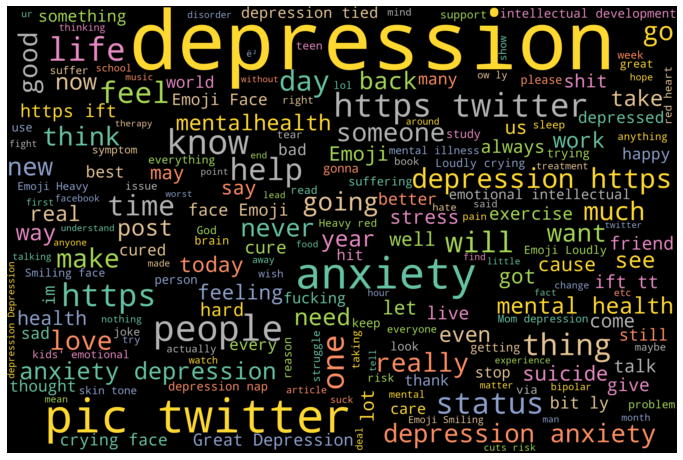

In [4]:
from wordcloud import WordCloud
dep_tweets = df[df.label == 1]
dep_string = []
for t in dep_tweets.message:
    dep_string.append(t)
dep_string = pd.Series(dep_string).str.cat(sep=' ')

wordcloud = WordCloud(width=3000, height=2000, background_color='black', colormap='Set2').generate(dep_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

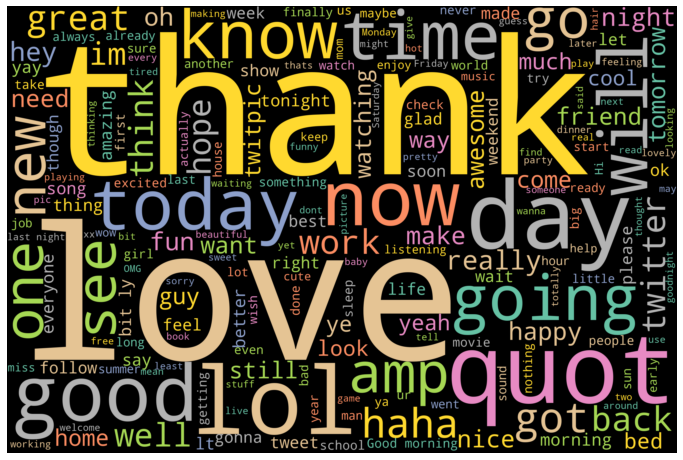

In [5]:
nd_tweets = df[df.label == 0]
nd_string = []
for t in nd_tweets.message:
    nd_string.append(t)
nd_string = pd.Series(nd_string).str.cat(sep=' ')

wordcloud = WordCloud(width=3000, height=2000, background_color='black', colormap='Set2').generate(nd_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

 ## Cleaning the Data

In [6]:
### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
        

In [7]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")

def lemmatize_stemming(t):
    return stemmer.stem(WordNetLemmatizer().lemmatize(t, pos='v'))

text = []

for i, msg in enumerate(temp1):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(lemmatize_stemming(w)) 
    
    text.append(listToString(filtered_sentence))
    
    

print(text)

['real good moment miss much', 'read manga http plurk com p mzp1e', 'comeagainjen http twitpic com 2y2lx http www youtub com watch v zogfqvh2me8', 'lapcat need send em account tomorrow odd i even refer tax those support evid though', 'add me on myspac myspac com lookthund', 'sleepi good time tonight though', 'silkcharm nbn someon alreadi say fiber home mean least regular', '23 24ï ½c possibl today nice', 'nite twittervill workout ciao', 'danann night darlin sweet dream', 'good morn everybodi', 'final i creat wordpress blog there alreadi blog seattl coffe communiti http tinyurl com c5uufd', 'kisha cnt get u til get frm u rememb ur top', 'nicolerichi yes rememb band it awesom will pleas repli', 'i realli love reflect shadow', 'blueaero ooo fantasi like fantasi novel check', 'rokchic28 prob i sell noth blog http snedwan com i get listen band itun', 'shipovalov quot nokla connect peopl quot', 'onc stay late start earli it good thing i like job', 'kal_penn i read new job congratul that fant

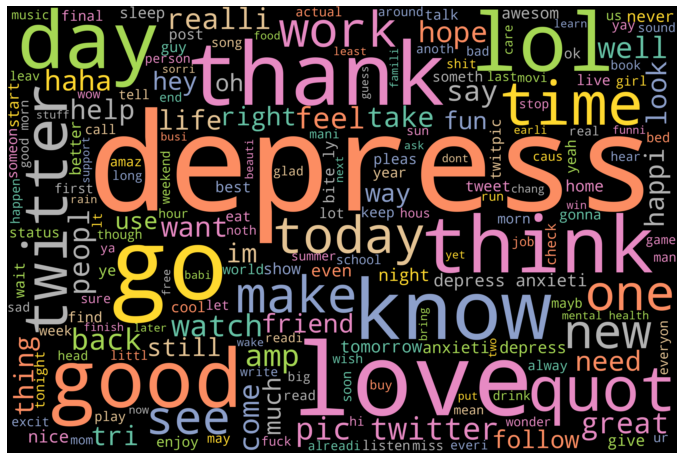

In [8]:
import re
y = listToString(text)
y = re.sub(r'http\S+', '', y)
wordcloud = WordCloud(width=3000, height=2000, background_color='black', colormap='Set2').generate(y)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Tokenize the data

In [9]:
## defining some variables ##

maxlen = 100
training_samples = 8000
validation_samples = 500
test_samples = 1814
max_words = 10000

## Just putting in the code for the tokenizer ##

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)

sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


### Padding the data to make of the same length ###
data = pad_sequences(sequences, maxlen=maxlen)

### Shapes ###
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 19408 unique tokens.
Shape of data tensor: (10314, 100)
Shape of label tensor: (10314,)


## Shuffling the data

In [10]:
## this is for shuffling the data


indices = np.arange(data.shape[0]) ## makes an array of integers from 0 to 10,314 [0,1, .. , 10314]
np.random.shuffle(indices)

data = data[indices]

labels = labels[indices]

## Splitting the data

In [11]:
## splitting into train and validate directories

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]

## Making a neural network

In [12]:
## here we are basically opening a .txt file and parsing it to obtain words and their associated coefficients in each line. 
## Then we make a dictionary to make the word as the key and the coefficients as the value
glove_dir = 'glove.twitter.27B.100d.txt'

embeddings_index = {}
f = open(glove_dir,encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Found %s word vectors.' % len(embeddings_index))



Found 1193515 word vectors.


In [13]:
## Making an embeddings matrix from embeddings vector ##

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 8000 samples, validate on 500 samples
Epoch 1/10
8000/8000 [==============================] - 2s 194us/step - loss: 0.4599 - acc: 0.8583 -

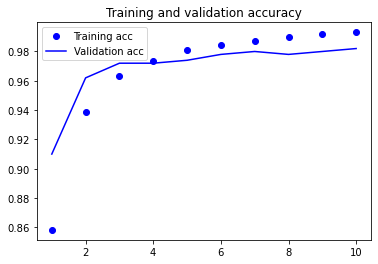

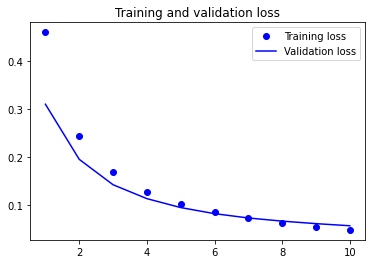

In [14]:

########### Model with the pre-trained word embeddings layer ############


## defining a model ##

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


## adding the embeddings layer and freezing it ##

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


## training the model ##

opt = Adam(lr = 0.0001)
model.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=64,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


## Plotting the results ##

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [15]:
### testing the model 1 ##

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)


1814/1814 [==============================] - 0s 72us/step


[0.0785693891321811, 0.9785005450248718]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 1,040,009
Trainable params: 1,040,009
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 500 samples
Epoch 1/7
8000/8000 [==============================] - 7s 829us/step - loss: 0.5256 - acc: 0.7740 - val_loss: 0.4634 - val_acc: 0.8020
Epoch 2/7
8000/8000 [==============================] - 6s 81

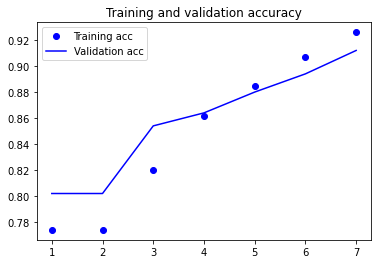

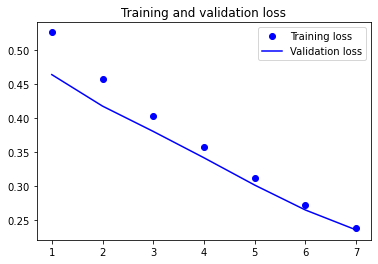

In [16]:

############# Model without the embeddings matrix ###########


## defining a model ##

model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()


## training the model ##

opt = Adam(lr = 0.0001)
model2.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model2.fit(x_train, y_train,
epochs=7,
batch_size=32,
validation_data=(x_val, y_val))
model2.save_weights('pre_trained_glove_model2.h5')


## Plotting the results ##

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
 ### testing the model 2 ##

model2.load_weights('pre_trained_glove_model2.h5')
model2.evaluate(x_test, y_test)

1814/1814 [==============================] - 0s 64us/step


[0.24284361987944605, 0.9244762659072876]

## Obtaining data from twitter for COVID-19 related tweets
### Twint

In [18]:
########## predicting depression in tweets with pandemic-related keywords ############



## loading the data ##

pandemic_df = pd.read_csv('PandemicKeywordDataSet.csv') 
pandemic_df= pandemic_df.astype(str) ## to convert float to string

## storing the data in an array ##

temp2 = []

for msg in pandemic_df['tweet']:
    temp2.append(msg)

### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

pandemic_text = []

for i, msg in enumerate(temp2):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(lemmatize_stemming(w))
    
    pandemic_text.append(listToString(filtered_sentence))

print(pandemic_text)


## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(pandemic_text)

sequences1 = tokenizer.texts_to_sequences(pandemic_text)
word_index1 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index1))

## padding to make data of equal length ##

pandemic_data = pad_sequences(sequences1, maxlen=maxlen)

## Making test data ##

x_test_pandemic = pandemic_data[:]

## Making predictions ##

y_pred_pandemic = model2.predict_classes(x_test_pandemic)


## looping through results to segregate dep vs no-dep ##

dep_c = 0
ndep_c = 0

for y in y_pred_pandemic:
    if y == 0:      ## 0 is for not depressive and 1 is for depressive
        ndep_c += 1

    else:
        dep_c +=1

total = ndep_c + dep_c
ndep_per = ndep_c*100/total
dep_per = dep_c*100/total

print(f'{ndep_per} percent of the tweets are not depressive')
print(f'{dep_per} percent of the tweets are depressive')



['totheworld_uwu i liter struggl like tmi pandem cockblock month i readi explod', 'yong stress ka na ngayong pandem tapo iistressin ka lalo haist', 'wheatgermdust heathrowsnowman mattwookey so dead popul uk increas last year wow pandem pandem brainwash insan', 'how pivot ecommerc tip canonukandi the covid 19 pandem kickstart camera compani digit transform journey it continu focus sharpli ecommerc offer new put pictur raconteur https co ncsvjr47h9 https co c0nqlczfok', 'idk want pandem p vouch call lillard shoot bad', 'yep menopaus burnout pandem aw lot forwallow x', 'ldncall can alway drive van increas job vacanc result supermarket retail launch onlin home deliveri servic due pandem amazon warehous bomb along', 'alexa pleas show idiot suggest regard pandem far', 'めっちゃいい人やんこの人', 'would rather go club hous parti small get togeth 4 5 friend pandem i bare see human besid immedi famili month kind question even https co b3p656il6z', 'markhazard2020 add i big support local govt decentralis bu

In [19]:
df = pd.read_csv('PandemicKeywordDataSet.csv')
print(df.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [20]:
########## predicting depression in tweets with covid-related keywords ############



## loading the data ##

covid_df = pd.read_csv('CovidKeywordDataSet.csv') 
covid_df= covid_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp2 = []

for msg in covid_df['tweet']:
    temp2.append(msg)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

covid_text = []

for i, msg in enumerate(temp2):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    covid_text.append(listToString(filtered_sentence))

print(covid_text)


## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(covid_text)

sequences1 = tokenizer.texts_to_sequences(covid_text)
word_index1 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index1))

## padding to make data of equal length ##

covid_data = pad_sequences(sequences1, maxlen=maxlen)

## Making test data ##

x_test_covid = covid_data[:]

## Making predictions ##

y_pred_covid = model2.predict_classes(x_test_covid)

## looping through results to segregate dep vs no-dep ##

dep_c = 0
ndep_c = 0

for y in y_pred_covid:
    if y == 0:      ## 0 is for not depressive and 1 is for depressive
        ndep_c += 1

    else:
        dep_c +=1

total = ndep_c + dep_c
ndep_per = ndep_c*100/total
dep_per = dep_c*100/total

print(f'{ndep_per} percent of the tweets are not depressive')
print(f'{dep_per} percent of the tweets are depressive')

['kerana iran negara yang beriklim panas Kalau memang dgn berhati hati boleh mencegah corona mana mungkin Putera Charles amp beberapa keluarga istana telah dijangkiti covid19 kerana kehidupan mereka paling hati2 amp berwaspada Kenapa demikian Mungkin jawapanya Kerana hidup', 'Assalamualaikum semua COVID 19 Kalau Memang kebersihan boleh mencegah corona mengapa Itali rakyatnya yg dijangkiti mencecah 135 000 org kerana Itali antara negara terbersih di Eropah Kalau Memang panas boleh membunuh corona di Iran kini angkanya sudah mencecah 67 000 org', 'Can trust Chinese Covid 19 science No https co WKr5UpFJuV', 'Zelf denk ik dat het amateurvoetbal eruit vliegt eigenlijk alle amateur sporten maar de profs gaan door aangezien ze hebben geleerd van de 1e coronagolf voetbal Coronapandemie coronamaatregelen hockey lockdown COVID19 Corona', 'COVID 19 UPDATE https co ACQE9useDn', 'VeraJourova EUProsecutor EU NextGenerationEU EUCO EU2020de COVID19 Corona https co 82BcoRyhrS', 'I Suhaib Ahmad commit v

56.9 percent of the tweets are not depressive
43.1 percent of the tweets are depressive


In [21]:
########## predicting depression in neutral tweets ############

## loading the data ##

neutral_df = pd.read_csv('NeutralDataSet.csv') 
neutral_df= neutral_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp3 = []

for msg in neutral_df['tweet']:
    temp3.append(msg)

print(temp3)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

neutral_text = []

for i, msg in enumerate(temp3):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    neutral_text.append(listToString(filtered_sentence))

print(neutral_text)



## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(neutral_text)

sequences2 = tokenizer.texts_to_sequences(neutral_text)
word_index2 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index2))

## padding to make data of equal length ##

neutral_data = pad_sequences(sequences2, maxlen=maxlen)

## Making test data ##

x_test_neutral = neutral_data[:]

## Making predictions ##

y_pred_neutral = model2.predict_classes(x_test_neutral)

## looping through results to segregate dep vs no-dep ##

dep_n = 0
ndep_n = 0

for y in y_pred_neutral:
    if y == 0:      ## 0 is for not depressive and 1 is for depressive
        ndep_n += 1

    else:
        dep_n +=1

total = ndep_n + dep_n
ndep_per_n = ndep_n*100/total
dep_per_n = dep_n*100/total

print(f'{ndep_per_n} percent of the tweets are not depressive')
print(f'{dep_per_n} percent of the tweets are depressive')

["@wougnet @webfoundation @A4A_Internet @ForCfma @UCC_Official @ISOCUg With 85% of uganda's residing in rural areas where women and girls constitute close to 60% it becomes abit hard for rural women to access ICTs and digital platforms\n@wougnet @webfoundation  @A4A_Internet", '"build(deps): bump hellojs from 1.18.4 to 1.18.6 in /website/client" has been accepted and will be released soon. https://t.co/QdX5X7bMS2', '@KamalaHarris By “together” do you mean only women that agree with you or all women? Will you back up your tweet by supporting Amy Coney Barrett, a woman that has worked hard with an impeccable record and rose to the highest opportunity in her profession? Let’s see...', 'love this btw. beers for the boys! and l&amp;p for the kids.', '@JackPosobiec Michelle...she is so fair minded, and not a racist bone in her body...', 'Coronavirus: Hot tub party broken up and students fined - https://t.co/d9AMZx6Xnk\n\nStudents who said they were celebrating a series of negative tests were

Found 7361 unique tokens.
86.4 percent of the tweets are not depressive
13.6 percent of the tweets are depressive


In [22]:
########## predicting depression in neutral tweets (with keyword "the") ############

## loading the data ##

q_df = pd.read_csv('TheKeywordDataSet.csv') 
q_df= q_df.astype(str) ## to convert float to string


## storing the data in an array ##

temp4 = []

for msg in q_df['tweet']:
    temp4.append(msg)

print(temp4)


### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

q_text = []

for i, msg in enumerate(temp4):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    q_text.append(listToString(filtered_sentence))

print(q_text)

## Tokenization of the data ##


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(q_text)

sequences3 = tokenizer.texts_to_sequences(q_text)
word_index3 = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index3))

## padding to make data of equal length ##

q_data = pad_sequences(sequences3, maxlen=maxlen)

## Making test data ##

x_test_q = q_data[:]

## Making predictions ##

y_pred_q = model2.predict_classes(x_test_q)

## looping through results to segregate dep vs no-dep ##

dep_q = 0
ndep_q = 0

for y in y_pred_q:
    if y == 0:      ## 0 is for not depressive and 1 is for depressive
        ndep_q += 1

    else:
        dep_q +=1

total = ndep_q + dep_q
ndep_per_q = ndep_q*100/total
dep_per_q = dep_q*100/total

print(f'{ndep_per_q} percent of the tweets are not depressive')
print(f'{dep_per_q} percent of the tweets are depressive')

['Is America great yet? 100 days, or fewer, until this national nightmare is over, 22 days until the election. \n#NotMyPresident\n#Resist\n#KingTrump\n#CommanderOfChaos\n#BidenHarrisTrump2020\n#TRE45ON\n#PersonWomanManCameraTV', '@D_ROX_7 Thanks for replying, anything posted on the link for your area? ^CC', '@fynbospollen @ACMJulier Crud under coverslip lifting it up slightly and so creating a local high that the mountant slides away from...', '@Ozturk5Alpaslan Adam gibii Adamm', '@ThatEricAlper The Monkees.', 'A bit like the fashion industry twelve months ahead', '@wank4t33n @_landofladies The Right', "I streamed your fancams alot today, I can't stop thinkinga about you even if I try, I keep thinking how are you and where are you right now and only wish the best for you and pray that you're doing really fine and running for your dream #HAPPY_K_DAY", "@roakeypoakey @ThatTimWalker AGREED!!\nThe other day I watched Rhod Gilbert's Day Experience episode when he does Social care. 1- the tr

Found 6678 unique tokens.
89.9 percent of the tweets are not depressive
10.1 percent of the tweets are depressive
